# IRON HACK PAYMENTS SYSTEM

In [1]:
import pandas as pd
import numpy as np

### Frequency of Service Usage

In [2]:
cash_request = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')
display(cash_request)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [3]:
cash_df_copy = cash_request.copy()

In [4]:
cash_df_copy.rename(columns={"cohort_month":"cohorts"})

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [32]:
cash_df_copy = cash_df_copy.rename(columns={"cohort_month":"cohorts"})

In [33]:
cash_df_copy['send_at'] = pd.to_datetime(cash_df_copy['send_at'], errors='coerce')#format='%Y-%m-%d %H:%M:%S')
cash_df_copy['request_month'] = cash_df_copy['send_at'].dt.tz_localize(None).dt.to_period('M')
#cash_df_copy['request_year'] = cash_df_copy['send_at'].dt.tz_localize(None).dt.to_period('Y')

cash_df_copy.rename(columns={"cohort_month":"cohorts"})

cash_df_copy['cohort_month'] = cash_df_copy.groupby('user_id')['request_month'].transform('min')

cash_df_copy = cash_df_copy.dropna(subset = ['request_month','cohort_month'])

#calculate month since cohort
#cash_df_copy['month_since_cohort'] = (cash_df_copy['request_month'].dt.year - cash_df_copy['cohort_month'].dt.year).apply(lambda x: x.n)
# filepath: c:\Users\martrix it solutions\Documents\ironhack\week 2\D3\project\project-1-ironhack-payments-2-en\Project1.ipynb
# Calculate months since cohort
cash_df_copy['month_since_cohort'] = (
    (cash_df_copy['request_month'].dt.year - cash_df_copy['cohort_month'].dt.year) * 12 +
    (cash_df_copy['request_month'].dt.month - cash_df_copy['cohort_month'].dt.month)
)
#count requests per cohort per month
cohort = cash_df_copy.groupby(['cohort_month', 'month_since_cohort']).size().unstack(fill_value=0)

display(cohort)

month_since_cohort,0,1,2,3,4
cohort_month,,,,,
2020-07,417,292,182,193,2
2020-08,3004,1242,1405,40,0
2020-09,1357,636,27,0,0
2020-10,6363,47,0,0,0
2020-11,169,0,0,0,0


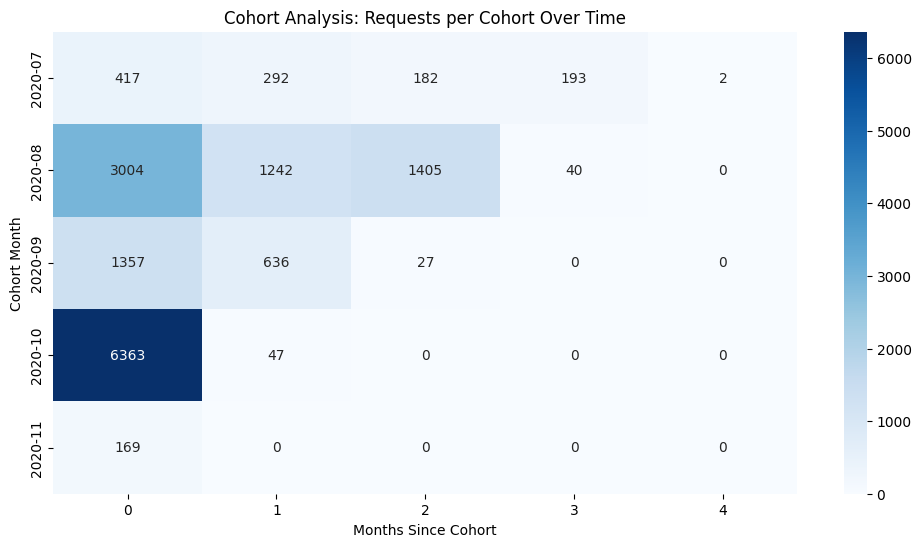

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(cohort, annot=True, fmt="d", cmap="Blues")
plt.title("Cohort Analysis: Requests per Cohort Over Time")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since Cohort")
plt.show()

### Incident Rate

In [27]:
fees_df_copy = fees.copy()

In [28]:
merged_df = cash_df_copy.merge(
    fees_df_copy,
    how='left',
    left_on='id',               # key of cash_id
    right_on='cash_request_id'  # key of fees
    )

In [17]:
cash_request.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

In [19]:
print(cash_request['status'].unique())

['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']


In [20]:
# filepath: c:\Users\martrix it solutions\Documents\ironhack\week 2\D3\project\project-1-ironhack-payments-2-en\Project1.ipynb
# Create an 'incident' column: 1 if status is 'failed', else 0
cash_df_copy['incident'] = cash_df_copy['status'].isin(['failed', 'error', 'declined']).astype(int)

In [23]:
cash_df_copy['incident'] = cash_df_copy['status'].isin(['rejected']).astype(int)

In [24]:
incident_rate = cash_df_copy.groupby(['cohort_month', 'month_since_cohort'])['incident'].mean().unstack(fill_value=0)
display(incident_rate)

month_since_cohort,0,1,2,3,4
cohort_month,,,,,
2020-07,0.438849,0.393836,0.263736,0.067358,0.0
2020-08,0.404461,0.259259,0.111032,0.050000,0.0
2020-09,0.386883,0.113208,0.037037,0.000000,0.0
2020-10,0.072922,0.021277,0.000000,0.000000,0.0
2020-11,0.011834,0.000000,0.000000,0.000000,0.0


In [22]:
print(cash_request.columns)

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')


### Revenue generated by Cohort

In [38]:
cash_df_copy = cash_df_copy.merge(fees,on ='id', how='left')

In [ ]:
revenue_by_cohort = cash_df_copy.groupby(['cohort_month', 'month_since_cohort'])['total_amount'].sum().unstack(fill_value=0)
display(revenue_by_cohort)

month_since_cohort,0,1,2,3,4
cohort_month,,,,,
2020-07,2085.0,1460.0,915.0,560.0,0.0
2020-08,14995.0,6210.0,4600.0,0.0,0.0
2020-09,6770.0,1840.0,0.0,0.0,0.0
2020-10,10945.0,0.0,0.0,0.0,0.0
2020-11,0.0,0.0,0.0,0.0,0.0


In [49]:
print(fees.columns)
print(cash_df_copy.columns)

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')
Index(['id', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'request_month', 'cohorts', 'month_since_cohort', 'incident', 'cohorts',
       'cohort_month', 'cash_request_id', 'type', 'status_y', 'category',
       'total_amount', 'reason', 'created_at_y', 'updated_at_y', 'paid_at',
       'from_date', 'to_date', 'charge_moment'],
      dtype='object')


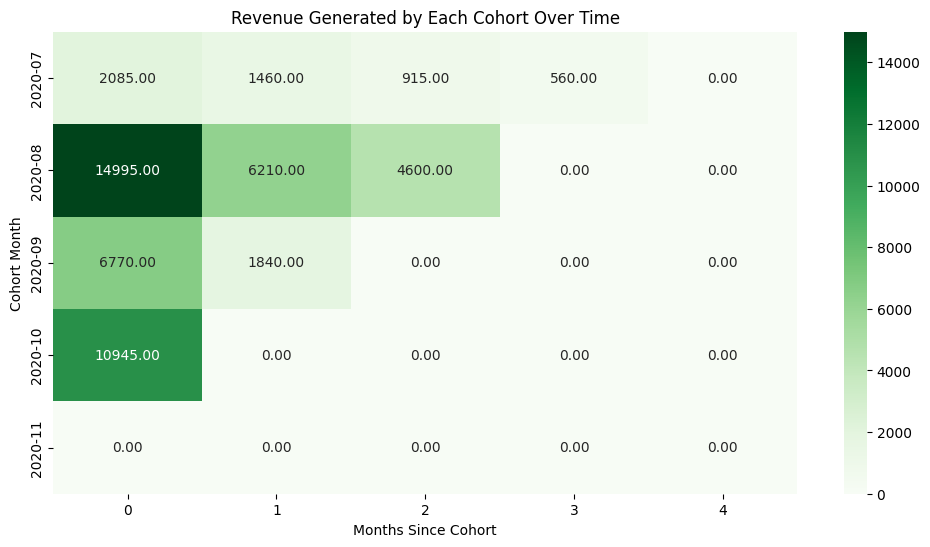

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(revenue_by_cohort, annot=True, fmt=".2f", cmap="Greens")
#sns.barplot(data = revenue_by_cohort, x = 'month_since_cohort', y = 'cohort_month', hue = 'total_amount')
plt.title("Revenue Generated by Each Cohort Over Time")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since Cohort")
plt.show()

### Exploratory Data Analysis

In [9]:
print(cash_request.info())
print(cash_request.describe())
print(cash_request.head())
print(cash_request.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [11]:
print(cash_request.duplicated().sum())

0


10798
status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


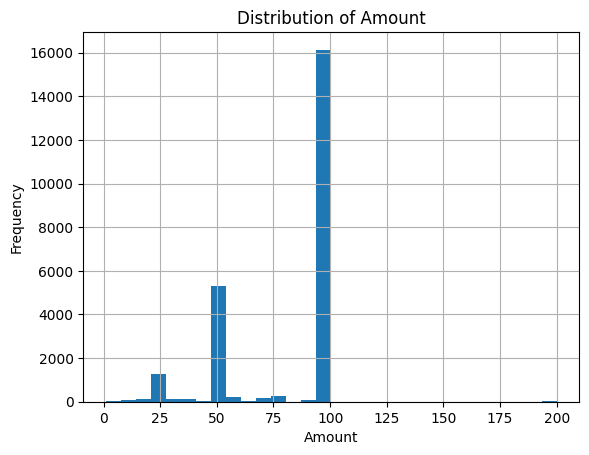

In [12]:
print(cash_request['user_id'].nunique())
print(cash_request['status'].value_counts())
cash_request['amount'].hist(bins=30)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [25]:
#### print(cash_request['send_at'].min(), cash_request['send_at'].max())

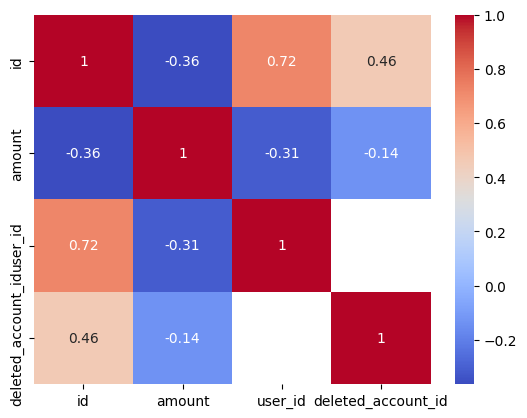

In [14]:
import seaborn as sns
sns.heatmap(cash_request.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [15]:
print(fees.info())
print(fees.describe())
print(fees.head())
print(fees.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None
                 id  cash_request_id  total_amount
count  21061.000000     21057.000000  21061.000000
mean   10645.355111     16318.4